### Analyzing the dataset for selecting the relevant data for restaurant recommendation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
## Importing the dataset
beng_restaurants = pd.read_csv('bengaluru_restaurants.csv')
zomato_1 = pd.read_csv('zomato.csv')
zomato_2 = pd.read_csv('zomato_dataset.csv')
zomato_1.head()

,Unnamed: 0,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,0,6317637,Le Petit Souffle,162.0,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314.0,Phillipines
1,1,6304287,Izakaya Kikufuji,162.0,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591.0,Phillipines
2,2,6300002,Heat - Edsa Shangri-La,162.0,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,...,Yes,No,No,No,4,4.4,Green,Very Good,270.0,Phillipines
3,3,6318506,Ooma,162.0,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,...,No,No,No,No,4,4.9,Dark Green,Excellent,365.0,Phillipines
4,4,6314302,Sambo Kojin,162.0,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.58445,...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229.0,Phillipines


In [3]:
## Listing the columns of the datasets
print("Bengaluru Restaurants Dataset Columns:")
print(beng_restaurants.columns.tolist())    
print("\nZomato Dataset 1 Columns:")
print(zomato_1.columns.tolist())
print("\nZomato Dataset 2 Columns:")
print(zomato_2.columns.tolist())

Bengaluru Restaurants Dataset Columns:
['name', 'address', 'addressObj/country', 'addressObj/postalcode', 'addressObj/state', 'cuisine', 'description', 'DietaryRestrictions', 'Dishes', 'Features', 'latitude', 'longitude', 'localAddress', 'Meal Type', 'numberOfReviews', 'phone', 'rankingDenominator', 'rankingPosition', 'rating', 'rawRanking']

Zomato Dataset 1 Columns:
['Unnamed: 0', 'Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes', 'Country']

Zomato Dataset 2 Columns:
['Restaurant_Name', 'Dining_Rating', 'Delivery_Rating', 'Dining Votes', 'Delivery_Votes', 'Cuisine ', 'Place_Name', 'City', 'Item_Name', 'Best_Seller', 'Votes', 'Prices']


In [8]:
### Checking for missing values in the datasets
print("Missing values in Bengaluru Restaurants Datasets:")
print(beng_restaurants.isnull().sum()/beng_restaurants.shape[0] * 100)
print("\nMissing values in Zomato Dataset 1:")
print(zomato_1.isnull().sum()/zomato_1.shape[0] * 100)
print("\nMissing values in Zomato Dataset 2:")
print(zomato_2.isnull().sum()/zomato_2.shape[0] * 100)  

Missing values in Bengaluru Restaurants Datasets:
name                      0.000000
address                   0.000000
addressObj/country        0.000000
addressObj/postalcode    13.281670
addressObj/state          0.000000
cuisine                   0.000000
description              90.345496
DietaryRestrictions       0.000000
Dishes                    0.000000
Features                  0.000000
latitude                  3.541061
longitude                 3.541061
localAddress              0.000000
Meal Type                 0.000000
numberOfReviews           0.000000
phone                     7.448068
rankingDenominator       40.856743
rankingPosition          40.856743
rating                   41.007427
rawRanking               40.856743
cuisines_list             0.000000
dtype: float64

Missing values in Zomato Dataset 1:
Unnamed: 0              0.000000
Restaurant ID           0.000000
Restaurant Name         0.000000
Country Code            0.000000
City                    0.00000

In [40]:
print("\nbengaluru dataset Shape:", beng_restaurants.shape)
print("zomato 1 dataset Shape:", zomato_1.shape)
print("zomato 2 dataset Shape:", zomato_2.shape)
print("Number of restuarnts in bengaluru dataset:", beng_restaurants.name.nunique())
print("Number of restuarnts in zomato 1 dataset:", zomato_1['Restaurant Name'].nunique())
print("Number of restuarnts in zomato 2 dataset:", zomato_2['Restaurant_Name'].nunique())


bengaluru dataset Shape: (9291, 21)
zomato 1 dataset Shape: (9552, 24)
zomato 2 dataset Shape: (123657, 13)
Number of restuarnts in bengaluru dataset: 7397
Number of restuarnts in zomato 1 dataset: 7447
Number of restuarnts in zomato 2 dataset: 826


In [37]:
## FInding out the number of unique cuisines available in each dataset
def unique_cusines(data=None,column=None):
    data['cuisines_list']=data[column]#.apply(lambda x: [i.strip() for i in x])
    df_cusines=pd.DataFrame(data['cuisines_list'].value_counts())
    df_cusines.reset_index(inplace=True)
    df_cusines.columns=['Cuisines','Count']

    fig=plt.figure(figsize=(10,5))
    sns.barplot(x='Count',y='Cuisines',data=df_cusines.head(30),palette='viridis')
    plt.title(column+' - Top 20 '+'('+str(df_cusines.shape[0])+' Cuisines'+')')
    plt.show()

C:\Users\SHAMBHAVVISEN\AppData\Local\Temp\ipykernel_25444\3355093345.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count',y='Cuisines',data=df_cusines.head(30),palette='viridis')


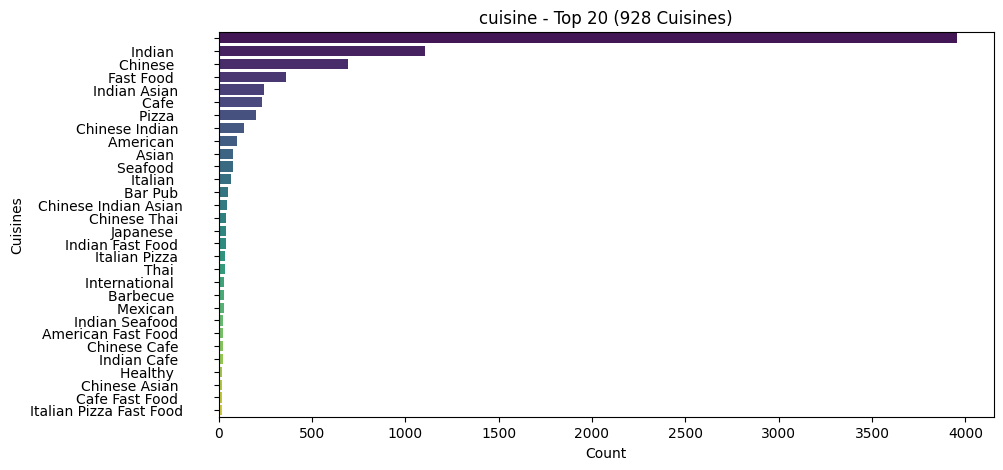

C:\Users\SHAMBHAVVISEN\AppData\Local\Temp\ipykernel_25444\3355093345.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count',y='Cuisines',data=df_cusines.head(30),palette='viridis')


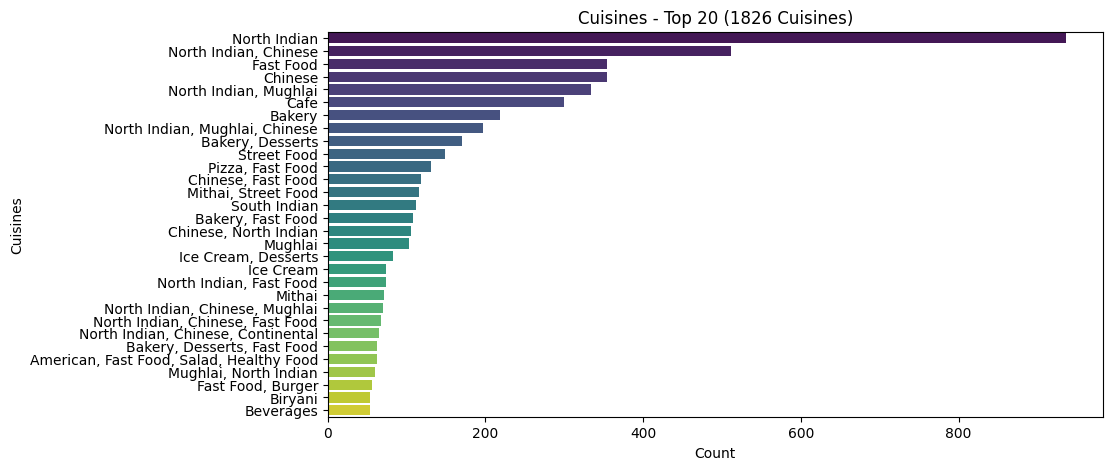

C:\Users\SHAMBHAVVISEN\AppData\Local\Temp\ipykernel_25444\3355093345.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count',y='Cuisines',data=df_cusines.head(30),palette='viridis')


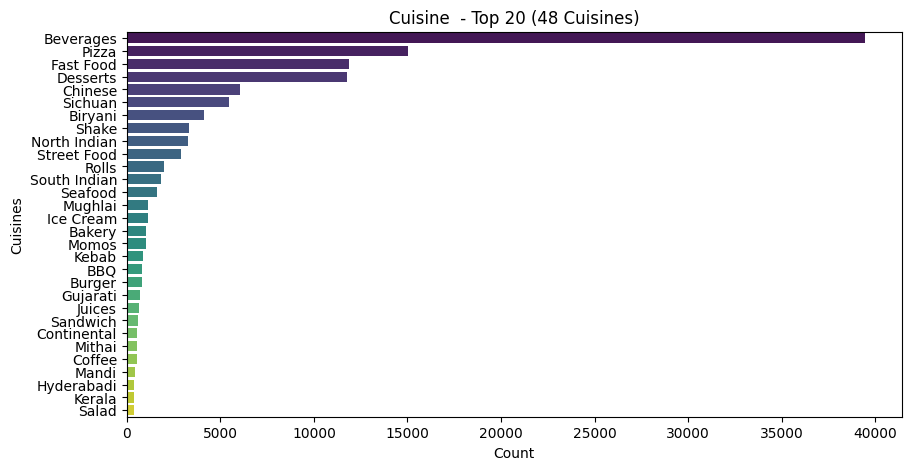

In [38]:
unique_cusines(beng_restaurants, 'cuisine')
unique_cusines(zomato_1, 'Cuisines')    
unique_cusines(zomato_2, 'Cuisine ')

C:\Users\SHAMBHAVVISEN\AppData\Local\Temp\ipykernel_25444\3355093345.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count',y='Cuisines',data=df_cusines.head(30),palette='viridis')


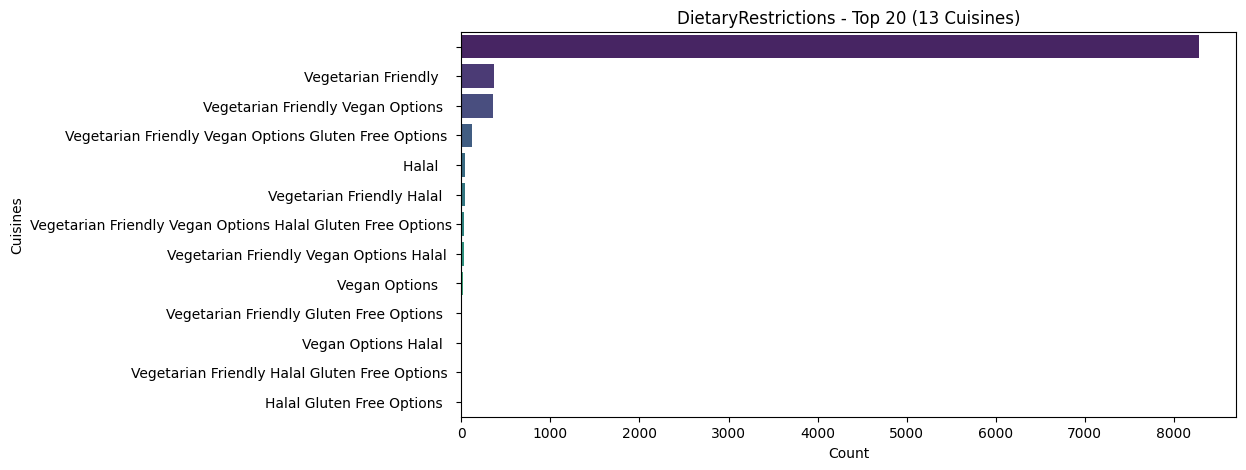

In [ ]:
unique_cusines(beng_restaurants,'DietaryRestrictions')

In [41]:
beng_restaurants.columns

Index(['name', 'address', 'addressObj/country', 'addressObj/postalcode',
       'addressObj/state', 'cuisine', 'description', 'DietaryRestrictions',
       'Dishes', 'Features', 'latitude', 'longitude', 'localAddress',
       'Meal Type', 'numberOfReviews', 'phone', 'rankingDenominator',
       'rankingPosition', 'rating', 'rawRanking', 'cuisines_list'],
      dtype='object')

In [52]:
beng_restaurants['rankingPosition'].describe()

count    5495.000000
mean     2929.918471
std      1733.293522
min         1.000000
25%      1446.500000
50%      2908.000000
75%      4467.500000
max      6510.000000
Name: rankingPosition, dtype: float64

Based on the performed EDA, all three datasets are equally qualified. However, the objective of the custom chatbot is to recommend restaurants within Bengaluru depending on user's cuisine perferences, dietary restrictions, location